<a href="https://colab.research.google.com/github/Jaswithagadde/internship/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

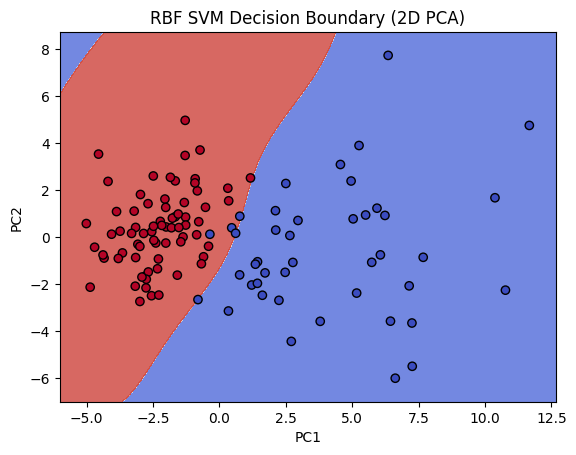

Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.97
Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.97


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_rbf_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_2d.fit(X_train_pca, y_train_pca)

def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

plot_decision_boundary(svm_rbf_2d, X_test_pca, y_test_pca, "RBF SVM Decision Boundary (2D PCA)")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean CV accuracy: {:.2f}".format(scores.mean()))
